In [74]:

from ryan_tools import *
import pandas_datareader.data as web
from pandas_datareader.data import Options
import fuckit
from mpl_toolkits.mplot3d import Axes3D

In [75]:
def download(ticker):
    data = Options(ticker, 'yahoo').get_all_data()
    body = pd.DataFrame(list(data['JSON']))
    data = pd.DataFrame(list(data.index), columns = data.index.names )
    data = data.merge(body,  left_on = 'Symbol' , right_on = 'contractSymbol' )
    del data['contractSymbol']
    del data['strike']
    del data['expiration']
    
    data.columns = data.columns.str.lower()
    data['days_left'] = ( data['expiry'] - datetime.datetime.today()).dt.days
    data.index = data['strike']
    return data


In [76]:
def vol( price ,kind, stock_price , strike, days_left):
    if kind == 'call':
        return (price - ( stock_price - strike)/np.log(days_left))
    if kind == 'put':
        return (price - ( strike - stock_price)/np.log(days_left))

In [77]:
data = download('spy')


In [78]:
data = data.groupby('expiry').filter(lambda x: len(x) > 10)
data['expiry'].value_counts()

2017-08-18    282
2017-07-21    267
2017-09-15    263
2017-06-30    251
2017-12-15    198
2018-03-29    186
2018-01-19    183
2018-07-20    179
2018-12-21    177
2018-03-16    175
2017-12-29    170
2018-06-15    163
2017-07-07    150
2017-10-20    143
2019-01-18    130
2017-07-14    124
2019-12-20    117
2018-09-21    105
2017-09-29     95
2017-07-28     77
2019-03-15     75
2017-07-26     73
2017-08-04     54
2017-07-05     53
2019-06-21     47
2017-07-19     24
2017-07-12     22
2017-08-02     13
Name: expiry, dtype: int64

In [79]:
data['distinct'] = data['type'] + data['days_left'].apply(str)
far  = data[data['expiry'] == data['expiry'].max()]
close = data[data['expiry'] == data['expiry'].min()]

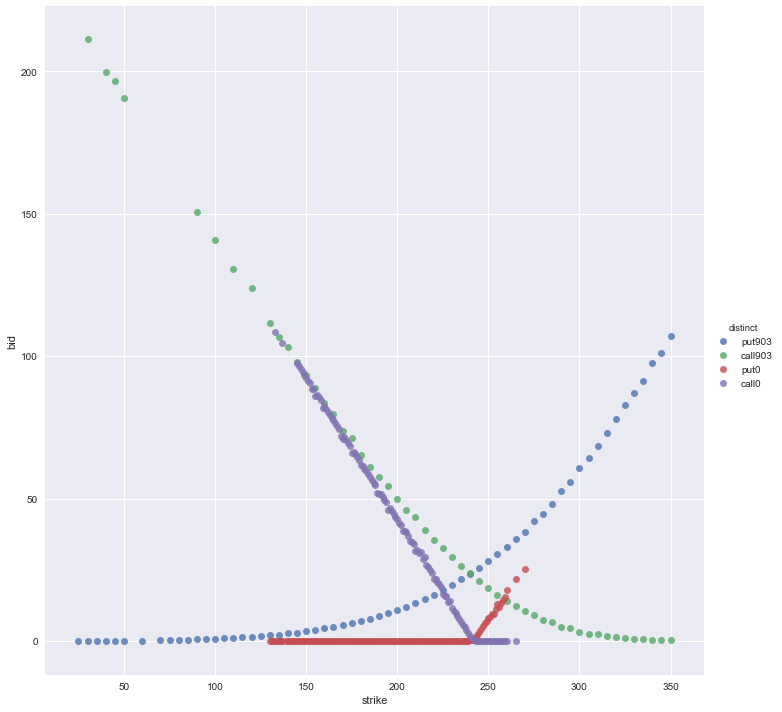

In [84]:
%matplotlib inline
sea.lmplot('strike', 'bid', data = far.append(close),hue = 'distinct',  fit_reg=False,size = 10)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


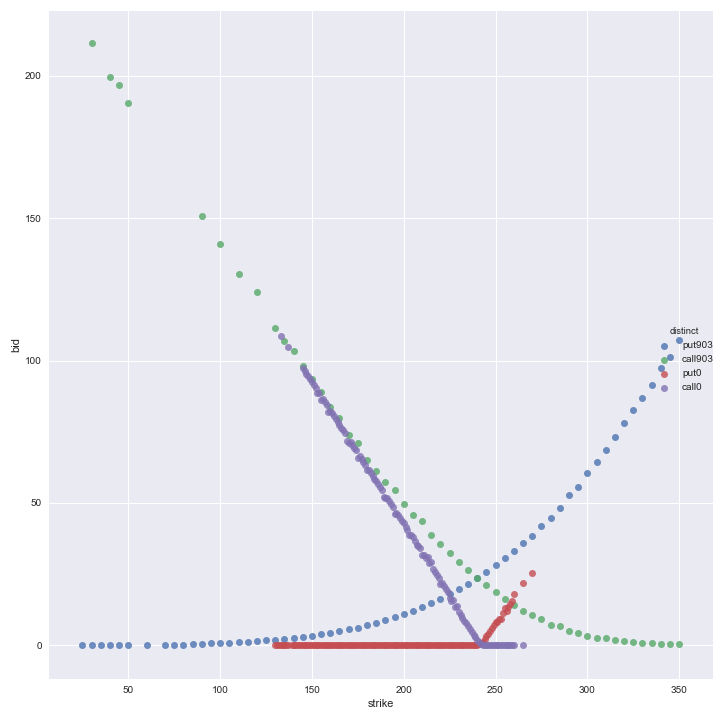

In [88]:
%matplotlib
sea.plt.ion()
axis = sea.lmplot('strike', 'bid', data = far.append(close),hue = 'distinct',  fit_reg=False,size = 10)


<IPython.core.display.Javascript object>


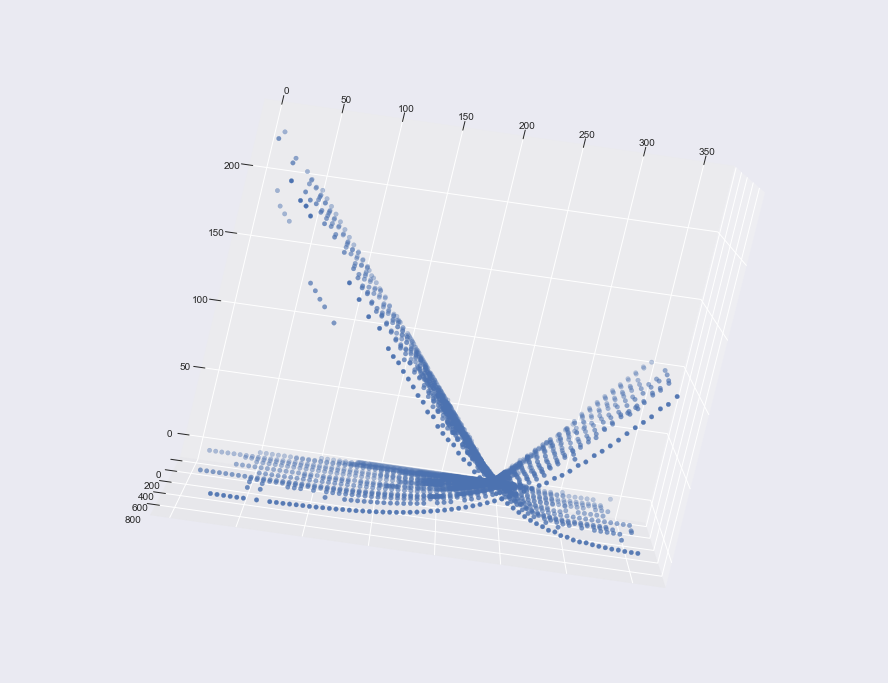

In [96]:

axis = Axes3D(sea.plt.figure())
puts = data[data['type']=='put']
axis.scatter(data['strike'], data['bid'], data['days_left'])
